In [17]:
import numpy as np
import pandas as pd
import shapely
import geopandas as gpd

from os import listdir
from os.path import join

import matplotlib.pyplot as plt

- Minnesota, Iowa, Wisconsin, North Dakota, South Dakota, Nebraska, Illinois, Indiana, Missouri, Michigan, Kansas

<Axes: >

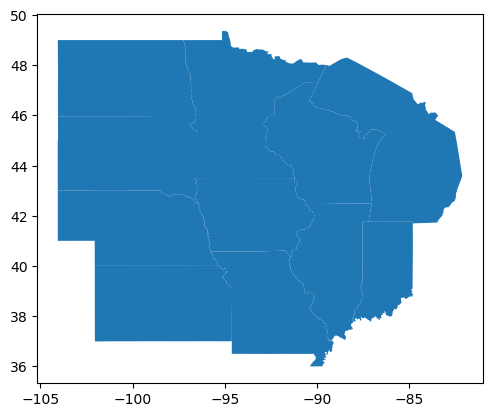

In [2]:
gdf = gpd.read_file('../data_v02/gadm41_USA_1.json')
states = ['Minnesota', 'Iowa', 'Wisconsin', 'NorthDakota', 'SouthDakota', 'Nebraska', 'Illinois', 'Indiana', 'Missouri', 'Michigan', 'Kansas']
gdf = gdf[gdf.NAME_1.isin(states)].reset_index(drop=True)
gdf.plot()

In [16]:
np.round(gdf.union_all().bounds)

array([-104.,   36.,  -82.,   49.])

In [5]:
# fluxes = gpd.read_file('../data_v02/target_fluxes_all_LE.csv')
# fluxes['geometry'] = [shapely.geometry.Point([row['lon'], row['lat']]) for _, row in fluxes.iterrows()]
fluxes = gpd.GeoDataFrame(fluxes).set_crs(gdf.crs)
fluxes

,TIMESTAMP,LE_F_MDS,LE_F_MDS_QC,NETRAD,G_F_MDS,TA_F,VPD_F,WS_F,PA_F,site,H_F_MDS,lat,lon,IGBP,geometry
0,20041003,8.205,1.0,12.1258333333,-2.44212,5.506,1.954,2.061,100.232,FLX_FI-Hyy,-2.07875,61.8474,24.2948,ENF,POINT (24.2948 61.8474)
1,20041004,15.9958,1.0,16.200625,-2.40884,7.068,2.556,2.466,100.023,FLX_FI-Hyy,0.123958,61.8474,24.2948,ENF,POINT (24.2948 61.8474)
2,20041005,3.31297,1.0,7.46645833333,-2.38404,9.594,1.155,4.287,98.919,FLX_FI-Hyy,-23.3258,61.8474,24.2948,ENF,POINT (24.2948 61.8474)
3,20041006,8.35042,1.0,14.378125,-2.43525,7.996,1.489,2.754,98.337,FLX_FI-Hyy,-11.6769,61.8474,24.2948,ENF,POINT (24.2948 61.8474)
4,20041007,3.64304,1.0,14.1252083333,-2.40884,8.248,1.756,3.872,98.308,FLX_FI-Hyy,-14.7854,61.8474,24.2948,ENF,POINT (24.2948 61.8474)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088580,20111119,0.72118,1.0,-50.226854583333335,-6.98208,-14.223,0.529,3.85,97.689,AMF_CA-MA2,-10.7892,50.171,-97.8762,CRO,POINT (-97.8762 50.171)
1088581,20111120,0.638906,1.0,-35.37474583333333,-9.48562,-14.157,0.413,3.685,98.774,AMF_CA-MA2,-10.1051,50.171,-97.8762,CRO,POINT (-97.8762 50.171)
1088582,20111121,0.547386,1.0,-50.23417916666667,-12.3033,-13.739,0.378,2.445,97.603,AMF_CA-MA2,-8.87983,50.171,-97.8762,CRO,POINT (-97.8762 50.171)
1088583,20111122,0.863575,1.0,-58.28176041666666,-6.29926,-3.963,0.782,4.965,97.838,AMF_CA-MA2,-15.0322,50.171,-97.8762,CRO,POINT (-97.8762 50.171)


<Axes: >

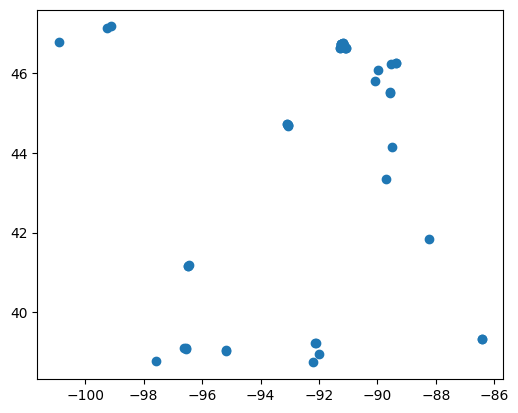

In [12]:
sites = fluxes[['geometry', 'site', 'IGBP']].drop_duplicates()
sites = gpd.sjoin(sites, gdf, how='inner')[['geometry', 'site', 'IGBP']]
sites.plot()

In [14]:
sites = sites.reset_index(drop=True)
sites.to_file("../data_v02/sites/sites.shp", driver="ESRI Shapefile")

In [7]:
fluxes = fluxes[fluxes['site'].isin(sites.site)]
print(f'Total Observations: {len(fluxes)}\tIGBP types: {len(fluxes.IGBP.unique())}')

Total Observations: 155276	IGBP types: 7


<Axes: >

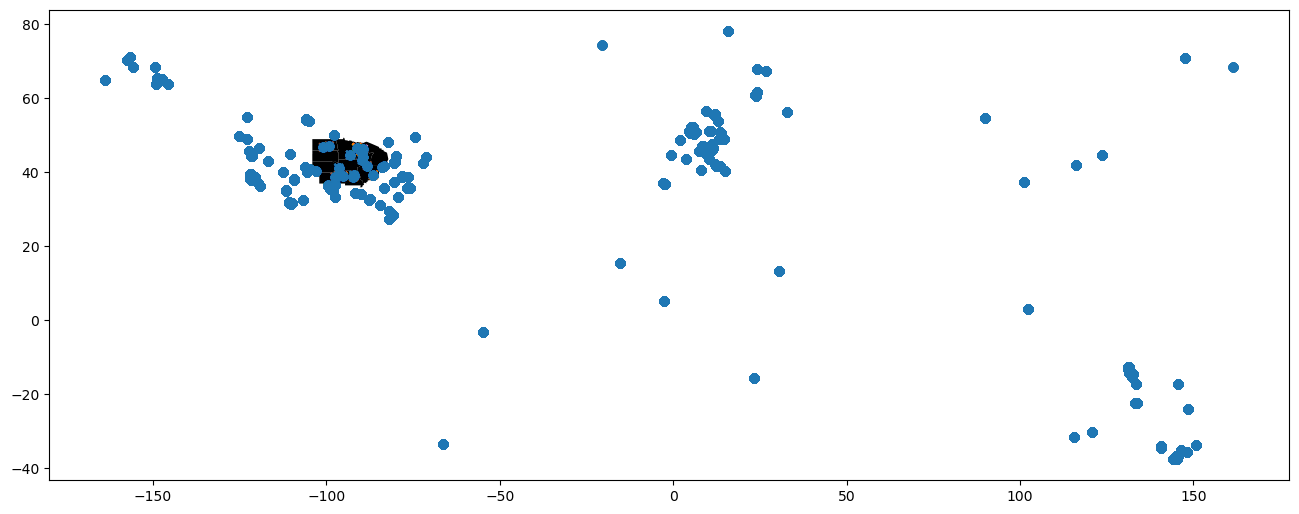

In [15]:
fig, ax = plt.subplots(figsize=(16,9))
gdf.plot(ax=ax, color='black')
sites.plot(ax=ax, column='IGBP', marker='x')
fluxes.plot(ax=ax, marker='o')

In [79]:
fluxes.drop('geometry', axis=1).to_csv('./data/LE_flux_dataset.csv')